In [36]:
# Imported Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans


In [37]:
#Converted CSV file into Data Frame Using Pandas Library
df =pd.read_csv("/content/combined_data (2).csv")
df.head(6)

,Inspection,Open Date,SIC,Establishment Name,description,keywords,Employee #,Age,Sex,Degree,Nature,Occupation,Construction
0,1626247.015,10/03/2022,NaN,Stellantis Sterling Stamping Plant,"At 4:00 pm on September 30, 2022, an employee ...","blunt force, blunt force trauma, fall, fall pr...",1,67.0,M,Fatality,NaN,NaN,NaN
1,1625678.015,10/04/2022,NaN,Penguin Random House Llc - Crawfordsville Dist,"At 7:45 p.m. on September 30, 2022, an employe...","blunt force, blunt force trauma, driver, forkl...",1,29.0,M,Fatality,NaN,Industrial truck and tractor equipment operators,NaN
2,1625642.015,09/30/2022,NaN,"Perdue Foods, Llc","At 7:00 a.m. on September 30, 2022, an employe...","abdomen, asphyxiated, crushed, defective equip...",1,51.0,M,Fatality,NaN,"Helpers, mechanics and repairers",NaN
3,1625608.015,09/30/2022,NaN,Taylor Communications Inc.,"At 1:00 a.m. on September 29, 2022, an employe...","brain, head, hemorrhage, loss of consciousness...",1,50.0,M,Fatality,NaN,NaN,NaN
4,1625570.015,09/30/2022,1799.0,"152893 - Blusky Restoration Contractors, Llc","At 2:30 p.m. on September 29, 2022, an employe...","blunt force, blunt force trauma, construction,...",1,59.0,M,Fatality,NaN,Occupation not reported,NaN
5,1625399.015,09/29/2022,NaN,"Samuel, Son & Co. (Usa) Inc.","At 4:00 a.m. on September 29, 2022, an employe...","asphyxiated, blunt force, blunt force trauma, ...",1,42.0,M,Fatality,NaN,NaN,NaN


In [38]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26266 entries, 0 to 26265
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Inspection          26266 non-null  float64
 1   Open Date           26266 non-null  object 
 2   SIC                 1382 non-null   float64
 3   Establishment Name  26266 non-null  object 
 4   description         26236 non-null  object 
 5   keywords            26196 non-null  object 
 6   Employee #          26266 non-null  int64  
 7   Age                 26235 non-null  float64
 8   Sex                 26266 non-null  object 
 9   Degree              26266 non-null  object 
 10  Nature              0 non-null      float64
 11  Occupation          21229 non-null  object 
 12  Construction        4227 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 2.6+ MB


In [39]:
#Checking the Null Values in the Dataset
df.isnull().sum()

Inspection                0
Open Date                 0
SIC                   24884
Establishment Name        0
description              30
keywords                 70
Employee #                0
Age                      31
Sex                       0
Degree                    0
Nature                26266
Occupation             5037
Construction          22039
dtype: int64

In [40]:
df['keywords']

0        blunt force, blunt force trauma, fall, fall pr...
1        blunt force, blunt force trauma, driver, forkl...
2        abdomen, asphyxiated, crushed, defective equip...
3        brain, head, hemorrhage, loss of consciousness...
4        blunt force, blunt force trauma, construction,...
                               ...                        
26261    amputation, cleaning, finger, point of operati...
26262    asphalt, ear, eye, fall, fracture, golf cart, ...
26263                                                  NaN
26264    construction, equipment failure, fall, fall pr...
26265    fracture, head, laceration, neck, steel, struc...
Name: keywords, Length: 26266, dtype: object

In [41]:
#Columns in the Dataset
df.columns

Index(['Inspection', 'Open Date', 'SIC', 'Establishment Name', 'description',
       'keywords', 'Employee #', 'Age', 'Sex', 'Degree', 'Nature',
       'Occupation', 'Construction'],
      dtype='object')

In [42]:
features = ['keywords']

In [43]:
df = df.dropna(subset = features)

In [44]:
df.isnull().sum()

Inspection                0
Open Date                 0
SIC                   24823
Establishment Name        0
description               0
keywords                  0
Employee #                0
Age                      30
Sex                       0
Degree                    0
Nature                26196
Occupation             5024
Construction          21971
dtype: int64

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [46]:
import re
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
def preprocess_text(text: str, remove_stopwords: bool) -> str:
    """This utility function sanitizes a string by:
    - removing links
    - removing special characters
    - removing numbers
    - removing stopwords
    - transforming in lowercase
    - removing excessive whitespaces
    Args:
        text (str): the input text you want to clean
        remove_stopwords (bool): whether or not to remove stopwords
    Returns:
        str: the cleaned text
    """

    # remove links
    text = re.sub(r"http\S+", "", text)
    # remove special chars and numbers
    text = re.sub("[^A-Za-z]+", " ", text)
    # remove stopwords
    if remove_stopwords:
        # 1. tokenize
        tokens = nltk.word_tokenize(text)
        # 2. check if stopword
        tokens = [w for w in tokens if not w.lower() in stopwords.words("english")]
        # 3. join back together
        text = " ".join(tokens)
    # return text in lower case and stripped of whitespaces
    text = text.lower().strip()
    return text

In [48]:
df['cleaned'] = df['keywords'].apply(lambda x: preprocess_text(x, remove_stopwords=True))

In [49]:
df.head(3)

,Inspection,Open Date,SIC,Establishment Name,description,keywords,Employee #,Age,Sex,Degree,Nature,Occupation,Construction,cleaned
0,1626247.015,10/03/2022,NaN,Stellantis Sterling Stamping Plant,"At 4:00 pm on September 30, 2022, an employee ...","blunt force, blunt force trauma, fall, fall pr...",1,67.0,M,Fatality,NaN,NaN,NaN,blunt force blunt force trauma fall fall prote...
1,1625678.015,10/04/2022,NaN,Penguin Random House Llc - Crawfordsville Dist,"At 7:45 p.m. on September 30, 2022, an employe...","blunt force, blunt force trauma, driver, forkl...",1,29.0,M,Fatality,NaN,Industrial truck and tractor equipment operators,NaN,blunt force blunt force trauma driver forklift...
2,1625642.015,09/30/2022,NaN,"Perdue Foods, Llc","At 7:00 a.m. on September 30, 2022, an employe...","abdomen, asphyxiated, crushed, defective equip...",1,51.0,M,Fatality,NaN,"Helpers, mechanics and repairers",NaN,abdomen asphyxiated crushed defective equipmen...


In [50]:
df['cleaned']


0        blunt force blunt force trauma fall fall prote...
1        blunt force blunt force trauma driver forklift...
2        abdomen asphyxiated crushed defective equipmen...
3        brain head hemorrhage loss consciousness mater...
4        blunt force blunt force trauma construction fa...
                               ...                        
26260    dizziness emergency response high temperature ...
26261    amputation cleaning finger point operation struck
26262    asphalt ear eye fall fracture golf cart head l...
26264    construction equipment failure fall fall prote...
26265           fracture head laceration neck steel struck
Name: cleaned, Length: 26196, dtype: object

In [51]:
# initialize the vectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
X = vectorizer.fit_transform(df['cleaned'])

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


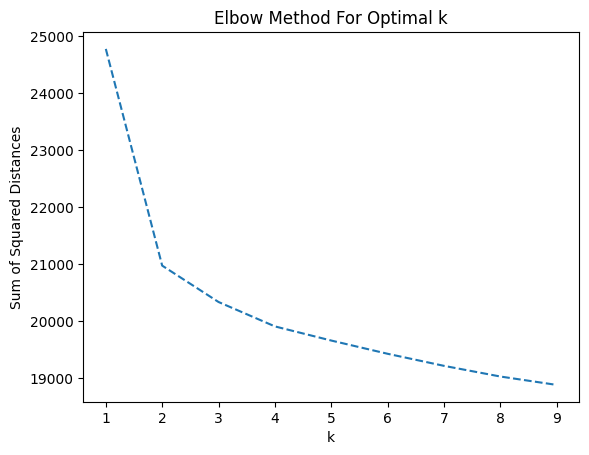

In [52]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(init="k-means++", n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
ax = sns.lineplot(x=K, y=Sum_of_squared_distances)
ax.lines[0].set_linestyle("--")
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [53]:
from sklearn.cluster import KMeans

# initialize kmeans with 3 centroids
kmeans = KMeans(n_clusters= 3, random_state=42)
# fit the model
kmeans.fit(X)
# store cluster labels in a variable
clusters = kmeans.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [54]:
from sklearn.decomposition import PCA

# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(X.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [55]:
# assign clusters and pca vectors to our dataframe 
df['cluster'] = clusters
df['x0'] = x0
df['x1'] = x1

In [56]:
from numba import none
from sklearn.cluster import KMeans
# initialize kmeans with 3 centroids
kmeans = KMeans(n_clusters= 3, random_state= 42)
# fit the model
kmeans.fit(X)
# store cluster labels in a variable
clusters = kmeans.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [57]:

def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(X.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = vectorizer.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
            
get_top_keywords(20)


Cluster 0
caught,laceration,roof,burn,falling,trauma,object,ladder,truck,leg,crushed,protection,construction,vehicle,force,blunt,head,fracture,struck,fall

Cluster 1
belt,laceration,jammed,thumb,operator,guarding,saw,press,point,conveyor,partial,lockout,hand,blade,fingertip,machine,caught,finger,amputated,amputation

Cluster 2
flame,flagman,flagger,fingertip,fl,flammable,fitting,fireworks,firearm,fire,flash,fixed,machine,operator,chest,respiratory,infection,legionnaire,disease,infectious


In [58]:
df['cluster']

0        0
1        0
2        0
3        0
4        0
        ..
26260    0
26261    1
26262    0
26264    0
26265    0
Name: cluster, Length: 26196, dtype: int32

In [59]:
# map clusters to appropriate labels 
cluster_map = {0: "Falls", 1: "Struck by Object", 2: "Electrocutions"}
# apply mapping
df['cluster'] = df['cluster'].map(cluster_map)

In [60]:
df

,Inspection,Open Date,SIC,Establishment Name,description,keywords,Employee #,Age,Sex,Degree,Nature,Occupation,Construction,cleaned,cluster,x0,x1
0,1626247.015,10/03/2022,NaN,Stellantis Sterling Stamping Plant,"At 4:00 pm on September 30, 2022, an employee ...","blunt force, blunt force trauma, fall, fall pr...",1,67.0,M,Fatality,NaN,NaN,NaN,blunt force blunt force trauma fall fall prote...,Falls,-0.176247,-0.224032
1,1625678.015,10/04/2022,NaN,Penguin Random House Llc - Crawfordsville Dist,"At 7:45 p.m. on September 30, 2022, an employe...","blunt force, blunt force trauma, driver, forkl...",1,29.0,M,Fatality,NaN,Industrial truck and tractor equipment operators,NaN,blunt force blunt force trauma driver forklift...,Falls,-0.187832,-0.161627
2,1625642.015,09/30/2022,NaN,"Perdue Foods, Llc","At 7:00 a.m. on September 30, 2022, an employe...","abdomen, asphyxiated, crushed, defective equip...",1,51.0,M,Fatality,NaN,"Helpers, mechanics and repairers",NaN,abdomen asphyxiated crushed defective equipmen...,Falls,-0.169995,0.059144
3,1625608.015,09/30/2022,NaN,Taylor Communications Inc.,"At 1:00 a.m. on September 29, 2022, an employe...","brain, head, hemorrhage, loss of consciousness...",1,50.0,M,Fatality,NaN,NaN,NaN,brain head hemorrhage loss consciousness mater...,Falls,-0.151037,-0.049161
4,1625570.015,09/30/2022,1799.0,"152893 - Blusky Restoration Contractors, Llc","At 2:30 p.m. on September 29, 2022, an employe...","blunt force, blunt force trauma, construction,...",1,59.0,M,Fatality,NaN,Occupation not reported,NaN,blunt force blunt force trauma construction fa...,Falls,-0.196861,-0.289497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26260,1308198.015,04/12/2018,NaN,"Suntrust Banks, Inc.","At 9:30 a.m. on April 10, 2018, Employee #1 ha...","dizziness, emergency response, high temperatur...",1,45.0,F,Fatality,NaN,Bakers,NaN,dizziness emergency response high temperature ...,Falls,-0.141437,-0.017342
26261,1319125.015,05/29/2018,NaN,Fantasy Cookie Corporation,"At 2:30 a.m. on April 10, 2019, Employee #1 wa...","amputation, cleaning, finger, point of operati...",1,57.0,M,Hospitalized injury,NaN,NaN,NaN,amputation cleaning finger point operation struck,Struck by Object,-0.188499,0.271169
26262,1317114.015,05/15/2018,NaN,Riverside County-Sheriffs Dept,"At 5:50 p.m. on April 10, 2018, Employee #1 wa...","asphalt, ear, eye, fall, fracture, golf cart, ...",1,30.0,F,Hospitalized injury,NaN,Law Enforcement: Police,NaN,asphalt ear eye fall fracture golf cart head l...,Falls,-0.180827,-0.145607
26264,1307533.015,04/10/2018,NaN,Maragos Painting Llc,"On April 10, 2018, during a safety inspection ...","construction, equipment failure, fall, fall pr...",1,39.0,M,Non Hospitalized injury,NaN,"Painters, construction and maintenance",FallDist: 6FallHt:6Cause: Interior painting an...,construction equipment failure fall fall prote...,Falls,-0.184150,-0.199927


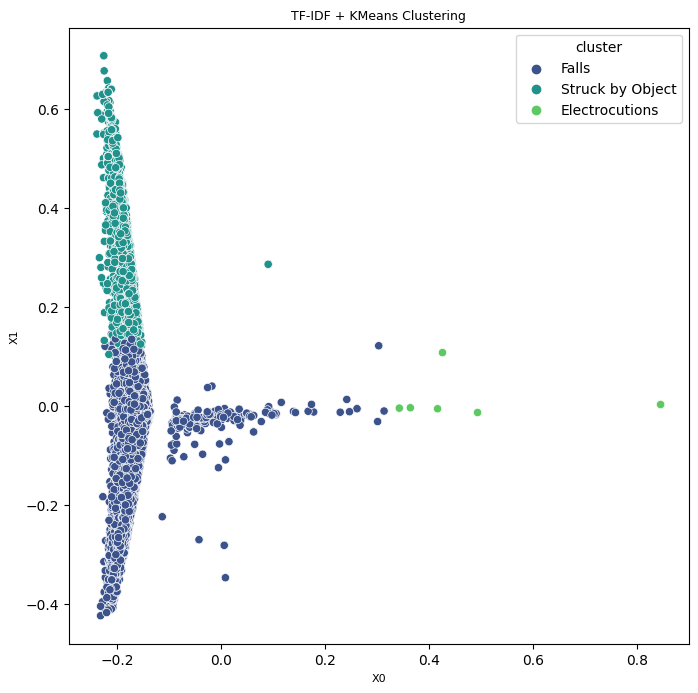

In [61]:
# set image size
plt.figure(figsize=(8,8))
# set a title
plt.title("TF-IDF + KMeans Clustering", fontdict={"fontsize": 9})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 8})
plt.ylabel("X1", fontdict={"fontsize": 8})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=df, x='x0', y='x1', hue='cluster', palette="viridis")
plt.show()

In [62]:
df.cluster.value_counts()

Falls               17094
Struck by Object     4670
Electrocutions       4432
Name: cluster, dtype: int64

In [63]:
100.* df.cluster.value_counts() / len(df.cluster)

Falls               65.254237
Struck by Object    17.827149
Electrocutions      16.918614
Name: cluster, dtype: float64

# Falls  - 65%
#Struck by Object - 17%
#Electrocutions - 16%